In [1]:
# 필요한 라이브러리 import
# import pandas해도 되지만, 
# padas라이브러리와 관련된 모든 것에 붙여주어야 함으로 as를 쓰면 짧게 줄여서 쓸 수 있어서 좋음.
import pandas as pd
##alt+Enter는 아래에 셀을 추가
#탭키는 자동 완성

In [2]:
CCTV_Seoul = pd.read_csv('../data/01. CCTV_in_Seoul.csv',  encoding='utf-8')
CCTV_Seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [3]:
#컬럼명 프린트
CCTV_Seoul.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [4]:
#인덱스에 따른 컬럼명 프린트
CCTV_Seoul.columns[0]

'기관명'

In [5]:
#첫번째 인덱스 명을 구별로 바꿈. 
#inplace=True는 프린트만 되는 것이 아니라, 원본을 바꾸라는 의미
CCTV_Seoul.rename(columns={CCTV_Seoul.columns[0] : '구별'}, inplace=True)
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


## 2-2. 엑셀파일 읽기 - 서울시 인구현황

In [6]:
pop_Seoul = pd.read_excel('../data/01. population_in_Seoul.xls',  encoding='utf-8')
pop_Seoul.head()
# 첫 행과 두번째 행이 header가 되어 이상하게 읽어옴.

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2017.1/4,합계,4202888,10197604,5000005,5197599,9926968,4871560,5055408,270636,128445,142191,2.36,1321458
3,2017.1/4,종로구,72654,162820,79675,83145,153589,75611,77978,9231,4064,5167,2.11,25425
4,2017.1/4,중구,59481,133240,65790,67450,124312,61656,62656,8928,4134,4794,2.09,20764


In [7]:
pop_Seoul = pd.read_excel('../data/01. population_in_Seoul.xls', 
                          header = 2,
                          usecols = 'B, D, G, J, N',
                          encoding='utf-8')
pop_Seoul.head()
#header가 세번째 줄, 인덱스는 2부터라는 셋팅, 
#엑셀의 열 중 B, D, G, J, N만을 사용.

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [8]:
pop_Seoul.rename(columns={pop_Seoul.columns[0] : '구별', 
                          pop_Seoul.columns[1] : '인구수', 
                          pop_Seoul.columns[2] : '한국인', 
                          pop_Seoul.columns[3] : '외국인', 
                          pop_Seoul.columns[4] : '고령자'}, inplace=True)
pop_Seoul.head()
#하나씩 컬럼 명을 변경함.

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


# 3. Pandas 기초

In [9]:
import pandas as pd
import numpy as np

In [10]:
# 이 둘은 자주 같이 사용됨.
# Series함수로 파이썬의 리스트를 만듦.
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [11]:
# 2013년 1월 1일부터 시작해서 6일간 datetime형태로 만듦.
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [12]:
# 랜덤한 값으로 dates를 인덱스(행으로)로 하여 각각의 컬럼을 A,B,C,D로 하여 데이터 프레임을 만듦. 
df = pd.DataFrame(np.random.randn(6,4), index=dates, 
                  columns=['A','B','C','D'])
df

,A,B,C,D
2013-01-01,-0.835345,0.549446,-0.231823,-0.686971
2013-01-02,-2.248239,0.315095,0.006052,0.237328
2013-01-03,-0.071118,0.108926,1.897762,2.284830
2013-01-04,0.905777,-0.843713,-0.505283,0.920403
2013-01-05,-1.588739,-0.610982,0.666440,-0.454953
2013-01-06,1.257333,-2.031229,0.081485,-1.067882


In [13]:
df.head()
# 5개만 프린트

,A,B,C,D
2013-01-01,-0.835345,0.549446,-0.231823,-0.686971
2013-01-02,-2.248239,0.315095,0.006052,0.237328
2013-01-03,-0.071118,0.108926,1.897762,2.284830
2013-01-04,0.905777,-0.843713,-0.505283,0.920403
2013-01-05,-1.588739,-0.610982,0.666440,-0.454953


In [14]:
df.head(3)
#3개만 프린트

,A,B,C,D
2013-01-01,-0.835345,0.549446,-0.231823,-0.686971
2013-01-02,-2.248239,0.315095,0.006052,0.237328
2013-01-03,-0.071118,0.108926,1.897762,2.284830


In [15]:
df.index
#인덱스가 되는 열의 값을 프린트

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [16]:
df.columns
#컬럼명 프린트

Index(['A', 'B', 'C', 'D'], dtype='object')

In [17]:
df.values
#값들을 프린트

array([[-0.8353451 ,  0.54944603, -0.23182348, -0.6869711 ],
       [-2.24823882,  0.31509462,  0.00605218,  0.23732795],
       [-0.07111843,  0.10892599,  1.89776177,  2.28482966],
       [ 0.90577659, -0.84371301, -0.50528293,  0.92040346],
       [-1.58873942, -0.61098247,  0.66643984, -0.45495334],
       [ 1.25733331, -2.03122855,  0.08148483, -1.06788164]])

In [18]:
df.info()
#데이터 프레임의 전체 정보를 프린트

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2013-01-01 to 2013-01-06
Freq: D
Data columns (total 4 columns):
A    6 non-null float64
B    6 non-null float64
C    6 non-null float64
D    6 non-null float64
dtypes: float64(4)
memory usage: 240.0 bytes


In [19]:
df.describe()
# 데이터 프레임의 통계를 프린트
# R의 summary

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.430055,-0.418743,0.319105,0.205459
std,1.383702,0.956243,0.866072,1.240154
min,-2.248239,-2.031229,-0.505283,-1.067882
25%,-1.400391,-0.785530,-0.172355,-0.628967
50%,-0.453232,-0.251028,0.043769,-0.108813
75%,0.661553,0.263552,0.520201,0.749635
max,1.257333,0.549446,1.897762,2.284830


In [20]:
df.sort_values(by='B', ascending=False)
#B열에 이해 내림차순

,A,B,C,D
2013-01-01,-0.835345,0.549446,-0.231823,-0.686971
2013-01-02,-2.248239,0.315095,0.006052,0.237328
2013-01-03,-0.071118,0.108926,1.897762,2.284830
2013-01-05,-1.588739,-0.610982,0.666440,-0.454953
2013-01-04,0.905777,-0.843713,-0.505283,0.920403
2013-01-06,1.257333,-2.031229,0.081485,-1.067882


In [21]:
df

,A,B,C,D
2013-01-01,-0.835345,0.549446,-0.231823,-0.686971
2013-01-02,-2.248239,0.315095,0.006052,0.237328
2013-01-03,-0.071118,0.108926,1.897762,2.284830
2013-01-04,0.905777,-0.843713,-0.505283,0.920403
2013-01-05,-1.588739,-0.610982,0.666440,-0.454953
2013-01-06,1.257333,-2.031229,0.081485,-1.067882


In [22]:
df['A']
#A열 프린트

2013-01-01   -0.835345
2013-01-02   -2.248239
2013-01-03   -0.071118
2013-01-04    0.905777
2013-01-05   -1.588739
2013-01-06    1.257333
Freq: D, Name: A, dtype: float64

In [23]:
df[0:3]
#0행부터 3보다 하나 작은 행까지 출력

,A,B,C,D
2013-01-01,-0.835345,0.549446,-0.231823,-0.686971
2013-01-02,-2.248239,0.315095,0.006052,0.237328
2013-01-03,-0.071118,0.108926,1.897762,2.284830


In [24]:
df['20130102':'20130104']
# 행의 인덱스 값으로 슬라이싱 하고 싶은 경우

,A,B,C,D
2013-01-02,-2.248239,0.315095,0.006052,0.237328
2013-01-03,-0.071118,0.108926,1.897762,2.284830
2013-01-04,0.905777,-0.843713,-0.505283,0.920403


In [25]:
df.loc[dates[0]]
# 위에서 사용했던 변수를 이용해서 슬라이싱 하고 싶은 경우

A   -0.835345
B    0.549446
C   -0.231823
D   -0.686971
Name: 2013-01-01 00:00:00, dtype: float64

In [26]:
df.loc[:,['A','B']]
#모든 행, A,B열 만 슬라이싱
#행과 열을 함께 슬라이싱하고자 하는 경우 loc함수 사용해야 함.
#loc는 location

,A,B
2013-01-01,-0.835345,0.549446
2013-01-02,-2.248239,0.315095
2013-01-03,-0.071118,0.108926
2013-01-04,0.905777,-0.843713
2013-01-05,-1.588739,-0.610982
2013-01-06,1.257333,-2.031229


In [27]:
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,-2.248239,0.315095
2013-01-03,-0.071118,0.108926
2013-01-04,0.905777,-0.843713


In [28]:
df.loc['20130102',['A','B']]

A   -2.248239
B    0.315095
Name: 2013-01-02 00:00:00, dtype: float64

In [29]:
df.loc[dates[0],'A']

-0.835345096324399

In [30]:
df.iloc[3]
#인덱스로 슬라이싱하고자 하는 경우 iloc

A    0.905777
B   -0.843713
C   -0.505283
D    0.920403
Name: 2013-01-04 00:00:00, dtype: float64

In [31]:
df.iloc[3:5,0:2]
#3~4까지의 행, 0부터 1까지의 열을 슬라이싱

,A,B
2013-01-04,0.905777,-0.843713
2013-01-05,-1.588739,-0.610982


In [32]:
df.iloc[[1,2,4],[0,2]]
#1,2,4의 행, 0부터 1까자의 열을 슬라이싱

,A,C
2013-01-02,-2.248239,0.006052
2013-01-03,-0.071118,1.897762
2013-01-05,-1.588739,0.666440


In [33]:
df.iloc[1:3,:]
#1부터 2까지의 행, 모든 열을 슬라이싱

,A,B,C,D
2013-01-02,-2.248239,0.315095,0.006052,0.237328
2013-01-03,-0.071118,0.108926,1.897762,2.284830


In [34]:
df.iloc[:,1:3]
#모든 행, 1부터 2까지의 열을 슬라이싱

,B,C
2013-01-01,0.549446,-0.231823
2013-01-02,0.315095,0.006052
2013-01-03,0.108926,1.897762
2013-01-04,-0.843713,-0.505283
2013-01-05,-0.610982,0.666440
2013-01-06,-2.031229,0.081485


In [35]:
df

,A,B,C,D
2013-01-01,-0.835345,0.549446,-0.231823,-0.686971
2013-01-02,-2.248239,0.315095,0.006052,0.237328
2013-01-03,-0.071118,0.108926,1.897762,2.284830
2013-01-04,0.905777,-0.843713,-0.505283,0.920403
2013-01-05,-1.588739,-0.610982,0.666440,-0.454953
2013-01-06,1.257333,-2.031229,0.081485,-1.067882


In [36]:
df[df.A > 0]
#조건을 주어 슬라이싱
#df데이터 프레임 중 A열의 값이 0보다 큰 것만 슬라이싱

,A,B,C,D
2013-01-04,0.905777,-0.843713,-0.505283,0.920403
2013-01-06,1.257333,-2.031229,0.081485,-1.067882


In [37]:
df[df > 0]
#df 데이터 프레임의 값 들 중 0보다 큰 것만 슬라이싱

,A,B,C,D
2013-01-01,NaN,0.549446,NaN,NaN
2013-01-02,NaN,0.315095,0.006052,0.237328
2013-01-03,NaN,0.108926,1.897762,2.284830
2013-01-04,0.905777,NaN,NaN,0.920403
2013-01-05,NaN,NaN,0.666440,NaN
2013-01-06,1.257333,NaN,0.081485,NaN


In [38]:
df2 = df.copy()
#데이터프레임 복사

In [39]:
df2['E'] = ['one', 'one','two','three','four','three']
df2
#파생 변수 만들기

,A,B,C,D,E
2013-01-01,-0.835345,0.549446,-0.231823,-0.686971,one
2013-01-02,-2.248239,0.315095,0.006052,0.237328,one
2013-01-03,-0.071118,0.108926,1.897762,2.284830,two
2013-01-04,0.905777,-0.843713,-0.505283,0.920403,three
2013-01-05,-1.588739,-0.610982,0.666440,-0.454953,four
2013-01-06,1.257333,-2.031229,0.081485,-1.067882,three


In [40]:
df2['E'].isin(['two','four'])
#E열에 해당 값들이 있는지 확인

2013-01-01    False
2013-01-02    False
2013-01-03     True
2013-01-04    False
2013-01-05     True
2013-01-06    False
Freq: D, Name: E, dtype: bool

In [41]:
df2[df2['E'].isin(['two','four'])]
#E열에 해당 값들이 있는지 확인하여 그 결과값만 프린트

,A,B,C,D,E
2013-01-03,-0.071118,0.108926,1.897762,2.284830,two
2013-01-05,-1.588739,-0.610982,0.666440,-0.454953,four


In [42]:
df

,A,B,C,D
2013-01-01,-0.835345,0.549446,-0.231823,-0.686971
2013-01-02,-2.248239,0.315095,0.006052,0.237328
2013-01-03,-0.071118,0.108926,1.897762,2.284830
2013-01-04,0.905777,-0.843713,-0.505283,0.920403
2013-01-05,-1.588739,-0.610982,0.666440,-0.454953
2013-01-06,1.257333,-2.031229,0.081485,-1.067882


In [43]:
df.apply(np.cumsum)
#df를 이용.numpy의 누적합 함수 적용하여 프린트

,A,B,C,D
2013-01-01,-0.835345,0.549446,-0.231823,-0.686971
2013-01-02,-3.083584,0.864541,-0.225771,-0.449643
2013-01-03,-3.154702,0.973467,1.671990,1.835187
2013-01-04,-2.248926,0.129754,1.166708,2.755590
2013-01-05,-3.837665,-0.481229,1.833147,2.300637
2013-01-06,-2.580332,-2.512457,1.914632,1.232755


In [44]:
df.apply(lambda x: x.max() - x.min())
# 람다는 함수를 더 단순하게 쓸 수 있는 문법
# x는 열을 의미
# df중 A열의 최대값과 최소값을 구해서 프린트

A    3.505572
B    2.580675
C    2.403045
D    3.352711
dtype: float64

In [45]:
df

,A,B,C,D
2013-01-01,-0.835345,0.549446,-0.231823,-0.686971
2013-01-02,-2.248239,0.315095,0.006052,0.237328
2013-01-03,-0.071118,0.108926,1.897762,2.284830
2013-01-04,0.905777,-0.843713,-0.505283,0.920403
2013-01-05,-1.588739,-0.610982,0.666440,-0.454953
2013-01-06,1.257333,-2.031229,0.081485,-1.067882


# 4. CCTV 데이터 파악하기

In [46]:
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [47]:
CCTV_Seoul.sort_values(by='소계', ascending=True).head(5)
#소계를 가지고 오름차순

,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,485,238,159,42,386
12,마포구,574,314,118,169,379
17,송파구,618,529,21,68,463
24,중랑구,660,509,121,177,109
23,중구,671,413,190,72,348


In [48]:
CCTV_Seoul.sort_values(by='소계', ascending=False).head(5)
#소계를 가지고 내림차순

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
18,양천구,2034,1843,142,30,467
14,서초구,1930,1406,157,336,398
21,은평구,1873,1138,224,278,468
20,용산구,1624,1368,218,112,398


In [49]:
#파생변수 생성
#최근을 2014, 2015, 2016년으로 보고 2013년도 이번보다 얼마나 증가했는지 비율을 구해보자.
CCTV_Seoul['최근증가율'] = (CCTV_Seoul['2016년'] + CCTV_Seoul['2015년'] + 
                        CCTV_Seoul['2014년']) / CCTV_Seoul['2013년도 이전']  * 100

CCTV_Seoul.sort_values(by='최근증가율', ascending=False).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1002,464,314,211,630,248.922414
9,도봉구,485,238,159,42,386,246.638655
12,마포구,574,314,118,169,379,212.101911
8,노원구,1265,542,57,451,516,188.929889
1,강동구,773,379,99,155,377,166.490765


# 5. 서울시 인구 데이터 파악하기

In [50]:
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [51]:
# 0번 행을 삭제하여 원본에 적용=> 합계가 보이는 행
pop_Seoul.drop([0], inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


In [52]:
#중복허용하지 말고 프린트

pop_Seoul['구별'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', nan],
      dtype=object)

In [53]:
#구별이 null인 행을 프린트
pop_Seoul[pop_Seoul['구별'].isnull()]

,구별,인구수,한국인,외국인,고령자
26,NaN,NaN,NaN,NaN,NaN


In [54]:
pop_Seoul.drop([26], inplace=True)
pop_Seoul.head()
#26행을 drop하여 원본에 적용

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


In [55]:
pop_Seoul['외국인비율'] = pop_Seoul['외국인'] / pop_Seoul['인구수'] * 100
pop_Seoul['고령자비율'] = pop_Seoul['고령자'] / pop_Seoul['인구수'] * 100
pop_Seoul.head()
# 열삭제는 이름을 넣어준다, pop_Seoul.drop(['고령자비율'], 1)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849


In [56]:
pop_Seoul.sort_values(by='인구수', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
23,강남구,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [57]:
pop_Seoul.sort_values(by='외국인', ascending=False).head(5)
#외국인 열에 의해 내림차순

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291
6,동대문구,369496.0,354079.0,15417.0,54173.0,4.172440,14.661322


In [58]:
pop_Seoul.sort_values(by='외국인비율', ascending=False).head(5)
#외국인 비율에 비해 내림차순

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


In [59]:
pop_Seoul.sort_values(by='고령자', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
12,은평구,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [60]:
pop_Seoul.sort_values(by='고령자비율', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
13,서대문구,327163.0,314982.0,12181.0,48161.0,3.723221,14.720797


# 6. Pandas 고급 두 DataFrame 병합하기

In [61]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'], 
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                   index=[0, 1, 2, 3])

df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7'],
                    'C': ['C4', 'C5', 'C6', 'C7'],
                    'D': ['D4', 'D5', 'D6', 'D7']},
                   index=[4, 5, 6, 7])

df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                    'B': ['B8', 'B9', 'B10', 'B11'],
                    'C': ['C8', 'C9', 'C10', 'C11'],
                    'D': ['D8', 'D9', 'D10', 'D11']},
                   index=[8, 9, 10, 11])

In [62]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [63]:
df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [64]:
df3

,A,B,C,D
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10
11,A11,B11,C11,D11


In [65]:
result = pd.concat([df1, df2, df3])
result
#concat함수는 행을 합할 때 사용.

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [66]:
result = pd.concat([df1, df2, df3], keys=['x', 'y', 'z'])
result
#데이터프레임 결합시, 원래의 데이터 프레임을 구분하는 키로 x, y, z를 넣어라!

A    B    C    D
x 0    A0   B0   C0   D0
  1    A1   B1   C1   D1
  2    A2   B2   C2   D2
  3    A3   B3   C3   D3
y 4    A4   B4   C4   D4
  5    A5   B5   C5   D5
  6    A6   B6   C6   D6
  7    A7   B7   C7   D7
z 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11

In [67]:
result.index

MultiIndex(levels=[['x', 'y', 'z'], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]],
           labels=[[0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]])

In [68]:
result.index.get_level_values(0)
#첫번 째 인덱스의 인스턴스(스칼라)

Index(['x', 'x', 'x', 'x', 'y', 'y', 'y', 'y', 'z', 'z', 'z', 'z'], dtype='object')

In [69]:
result.index.get_level_values(1)
#두번 째 인덱스의 인스턴스(스칼라)

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype='int64')

In [70]:
result

A    B    C    D
x 0    A0   B0   C0   D0
  1    A1   B1   C1   D1
  2    A2   B2   C2   D2
  3    A3   B3   C3   D3
y 4    A4   B4   C4   D4
  5    A5   B5   C5   D5
  6    A6   B6   C6   D6
  7    A7   B7   C7   D7
z 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11

In [71]:
df4 = pd.DataFrame({'B': ['B2', 'B3', 'B6', 'B7'], 
                    'D': ['D2', 'D3', 'D6', 'D7'],
                    'F': ['F2', 'F3', 'F6', 'F7']},
                   index=[2, 3, 6, 7])

result = pd.concat([df1, df4], axis=1)
#axis=1 컬럼에 따라 합함.

In [72]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [73]:
df4

,B,D,F
2,B2,D2,F2
3,B3,D3,F3
6,B6,D6,F6
7,B7,D7,F7


In [74]:
result

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


In [75]:
result = pd.concat([df1, df4], axis=1, join='inner')
result
#중복되는 부분만 합할 것.

,A,B,C,D,B,D,F
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


In [76]:
result = pd.concat([df1, df4], axis=1, join_axes=[df1.index])
result
#df1의 인덱스가 기준이 되고, 그 기준에 맞추어 합할 것.

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


In [77]:
result = pd.concat([df1, df4], ignore_index=True)
result

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
4,NaN,B2,NaN,D2,F2
5,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


In [78]:
left = pd.DataFrame({'key': ['K0', 'K4', 'K2', 'K3'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})

right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                      'C': ['C0', 'C1', 'C2', 'C3'],
                      'D': ['D0', 'D1', 'D2', 'D3']})

In [79]:
left

,key,A,B
0,K0,A0,B0
1,K4,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [80]:
right

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


In [81]:
pd.merge(left, right, on='key')
#교집합

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3


In [82]:
pd.merge(left, right, how='left', on='key')
#left의 key를 기준으로 right를 붙여라

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K4,A1,B1,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [83]:
pd.merge(left, right, how='right', on='key')
#right의 key를 기준으로 elft를 붙여라

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3
3,K1,NaN,NaN,C1,D1


In [84]:
pd.merge(left, right, how='outer', on='key')
#합집합

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K4,A1,B1,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3
4,K1,NaN,NaN,C1,D1


In [85]:
pd.merge(left, right, how='inner', on='key')
#교집합

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3


# 7. CCTV 데이터와 인구 데이터 합치고 분석하기

In [86]:
data_result = pd.merge(CCTV_Seoul, pop_Seoul, on='구별')
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,1292,430,584,932,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,379,99,155,377,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,369,120,138,204,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,388,258,184,81,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,846,260,390,613,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [87]:
del data_result['2013년도 이전']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']
data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [88]:
data_result.set_index('구별', inplace=True)
data_result.head()
#그래프 그리기 편하게 구별항목을 인덱스로 set

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [89]:
np.corrcoef(data_result['고령자비율'],data_result['소계'])
#상관관계를 확인
#음의 상관관계가 있긴 하나 크지 않음.

array([[ 1.        , -0.28078554],
       [-0.28078554,  1.        ]])

In [90]:
np.corrcoef(data_result['외국인비율'],data_result['소계'])
#음의 상관관계가 있긴 하나 적음

array([[ 1.        , -0.13607433],
       [-0.13607433,  1.        ]])

In [91]:
np.corrcoef(data_result['인구수'],data_result['소계'])
#양의 상관관계가 있긴 하나 크지 않음.

array([[1.        , 0.30634228],
       [0.30634228, 1.        ]])

In [92]:
data_result.sort_values(by='소계', ascending=False).head(5)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964
서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308
은평구,1873,85.237258,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


In [93]:
data_result.sort_values(by='인구수', ascending=False).head(5)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
송파구,618,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
노원구,1265,188.929889,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [94]:
#인구수와 CCTV소계와의 상관계수를 구하여 상관관계를 판별하시오.

In [95]:
#최근 증가율과 CCTV소계와의 상관계수를 구하여 상관관계를 판별하시오.

# 8. 그래프 그리기 기초 - matplotlib

In [96]:
import matplotlib.pyplot as plt
%matplotlib inline
#아래 노트에 mapplotlib그래프가 나타나도록 하는 명령

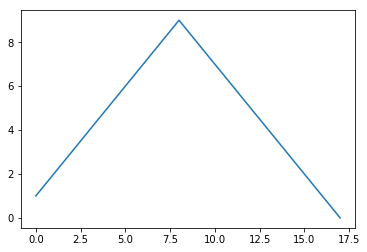

In [97]:
plt.figure() #전체 그래프의 틀을 잡음
plt.plot([1,2,3,4,5,6,7,8,9,8,7,6,5,4,3,2,1,0]) #데이터를 넣어 그림을 그림
plt.show() #보여지기

In [98]:
import numpy as np

t = np.arange(0,12,0.01) #0부터 12까지 0.01씩 증가하는 리스트

y = np.sin(t) #t에 대한 사인값을 구함.

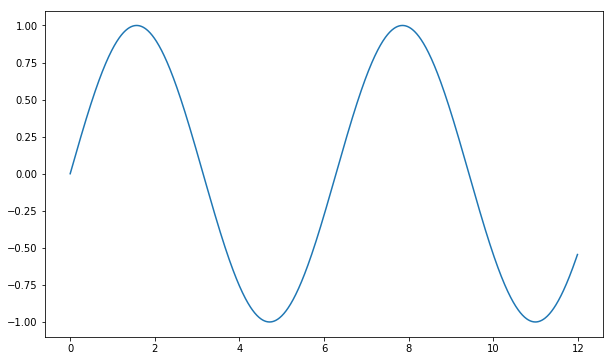

In [99]:
plt.figure(figsize=(10,6)) 
plt.plot(t, y) 
plt.show()

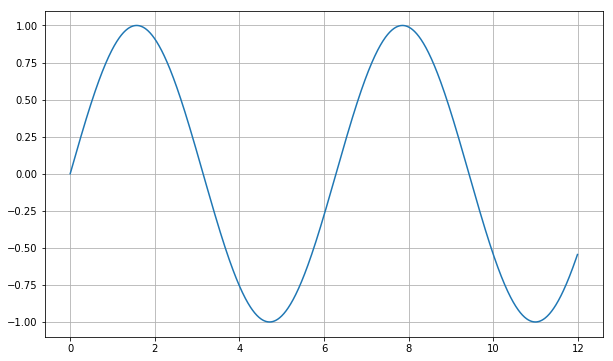

In [100]:
plt.figure(figsize=(10,6))
plt.plot(t, y)
plt.grid() # 그리드 적용하기
plt.show()

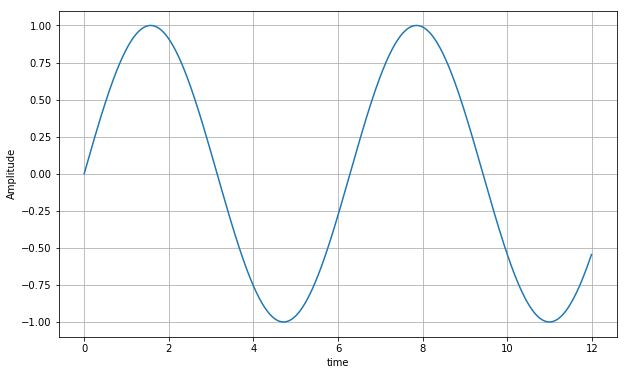

In [101]:
plt.figure(figsize=(10,6))
plt.plot(t, y)
plt.grid()
plt.xlabel('time')       # x축 라벨 적용하기
plt.ylabel('Amplitude')  # y축 라벨 적용하기
plt.show()

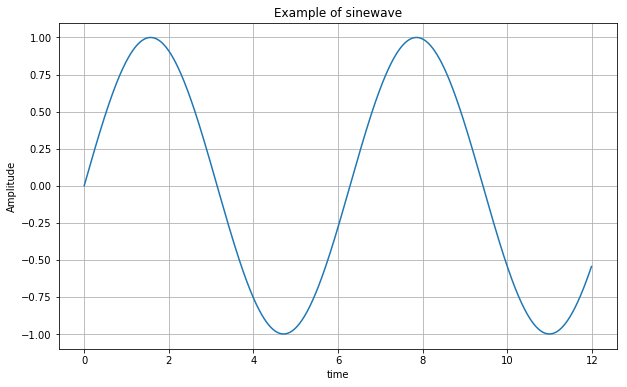

In [102]:
plt.figure(figsize=(10,6))
plt.plot(t, y)
plt.grid()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.show()

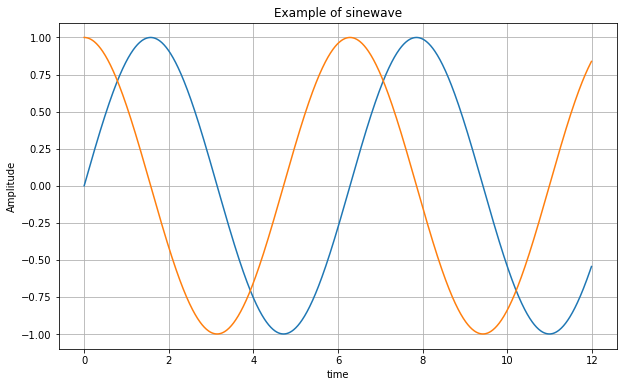

In [103]:
# 두 개의 그래프 겹쳐 그리기
plt.figure(figsize=(10,6))
plt.plot(t, np.sin(t))
plt.plot(t, np.cos(t)) 
plt.grid()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.show()

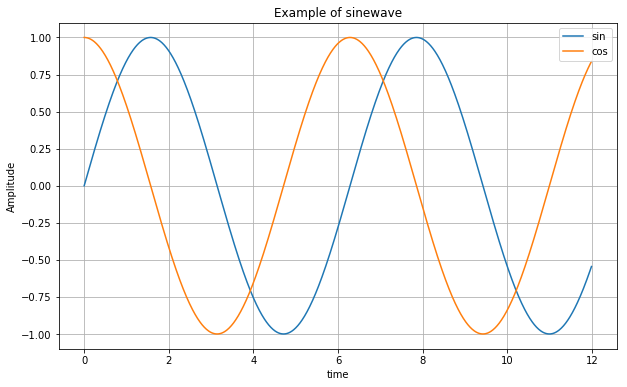

In [104]:
plt.figure(figsize=(10,6))
plt.plot(t, np.sin(t), label='sin')
plt.plot(t, np.cos(t), label='cos')
plt.grid()
plt.legend()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.show()

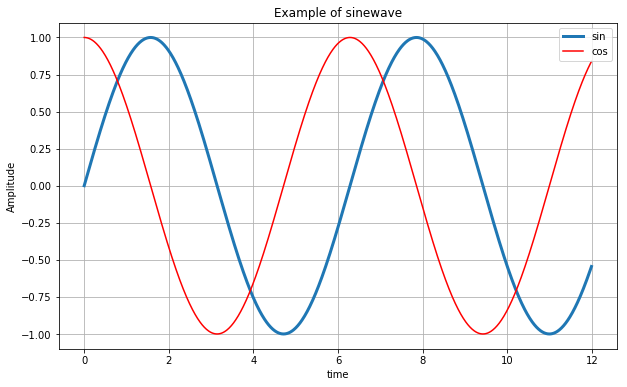

In [105]:
plt.figure(figsize=(10,6))
plt.plot(t, np.sin(t), lw=3, label='sin')
plt.plot(t, np.cos(t), 'r', label='cos')
plt.grid()
plt.legend()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.show()

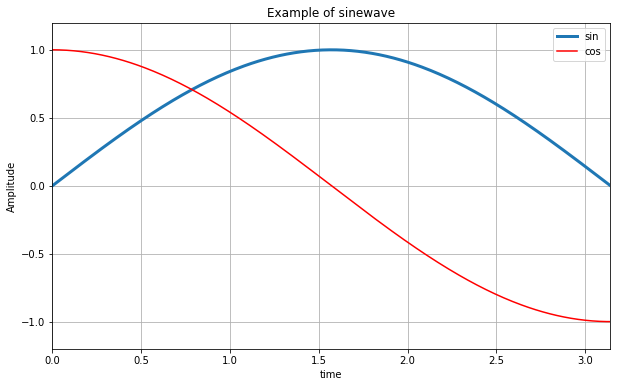

In [106]:
plt.figure(figsize=(10,6))
plt.plot(t, np.sin(t), lw=3, label='sin')
plt.plot(t, np.cos(t), 'r', label='cos')
plt.grid()
plt.legend()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.ylim(-1.2, 1.2)
plt.xlim(0, np.pi) #np.pi는 상수
plt.show()

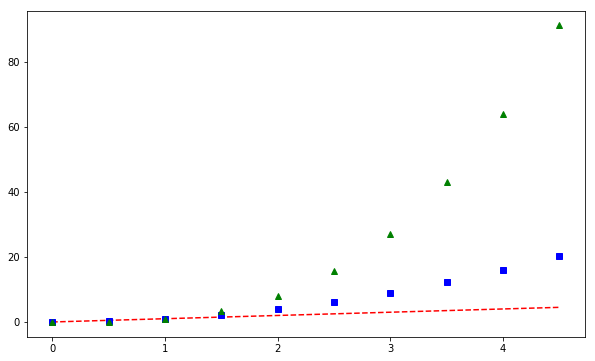

In [107]:
#3개의 그래프를 겹쳐서 그려보자
t = np.arange(0, 5, 0.5)

plt.figure(figsize=(10,6))
plt.plot(t, t, 'r--') #red점선
plt.plot(t, t**2, 'bs') #blue 스퀘어
plt.plot(t, t**3, 'g^') #green 세모 
plt.show()

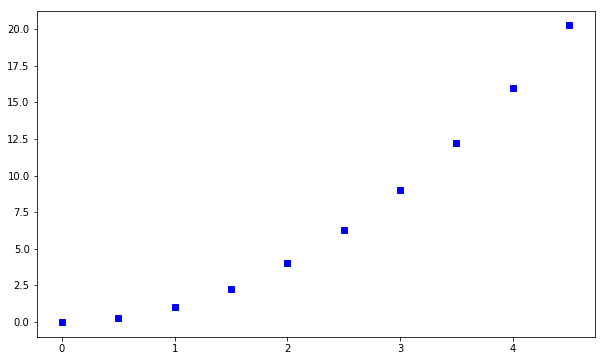

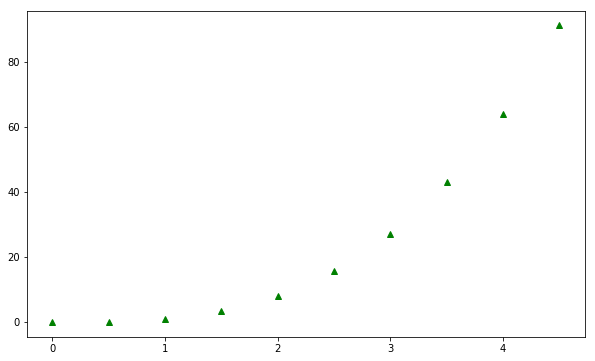

In [108]:
t = np.arange(0, 5, 0.5)

plt.figure(figsize=(10,6))
pl1 = plt.plot(t, t**2, 'bs')

plt.figure(figsize=(10,6))
pl2 = plt.plot(t, t**3, 'g^')

plt.show()

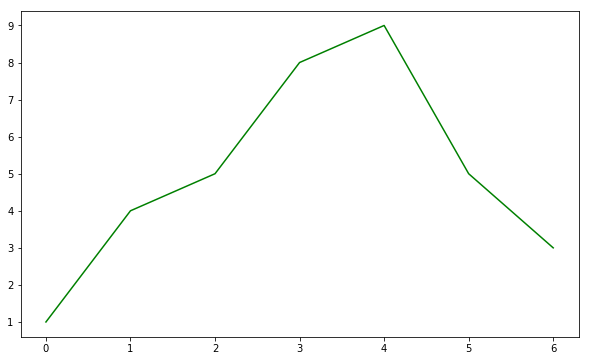

In [109]:
t = [0, 1, 2, 3, 4, 5, 6] 
y = [1, 4, 5, 8, 9, 5, 3]

plt.figure(figsize=(10,6))
plt.plot(t, y, color='green')
plt.show()

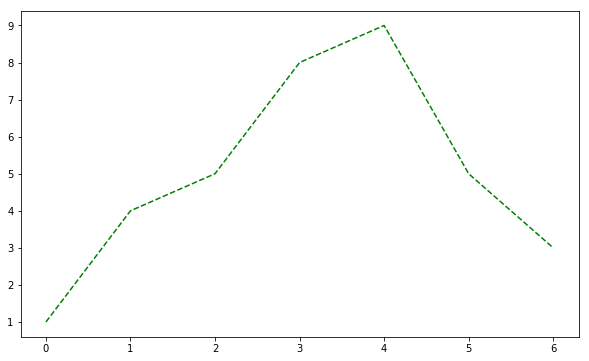

In [110]:
plt.figure(figsize=(10,6))
plt.plot(t, y, color='green', linestyle='dashed')
plt.show()

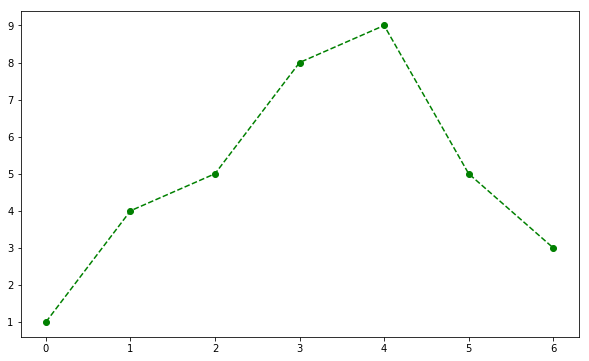

In [111]:
plt.figure(figsize=(10,6))
plt.plot(t, y, color='green', linestyle='dashed', marker='o')
plt.show()

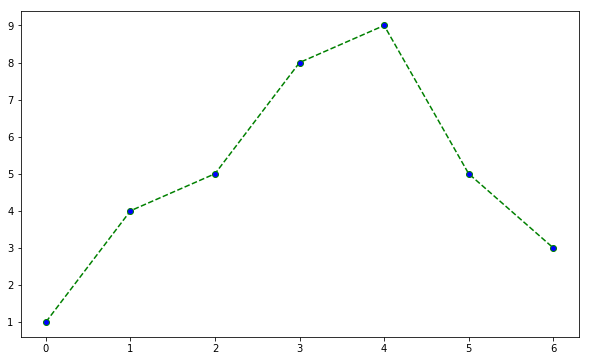

In [112]:
plt.figure(figsize=(10,6))
plt.plot(t, y, color='green', linestyle='dashed', marker='o',
        markerfacecolor = 'blue')
plt.show()

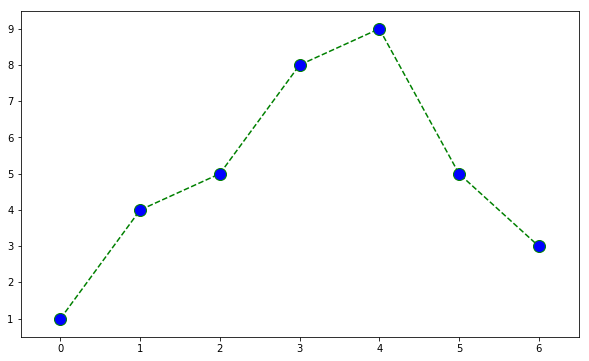

In [113]:
plt.figure(figsize=(10,6))
plt.plot(t, y, color='green', linestyle='dashed', marker='o',
        markerfacecolor = 'blue', markersize=12)

plt.xlim([-0.5, 6.5])
plt.ylim([0.5, 9.5])
plt.show()

In [114]:
t = np.array([0,1,2,3,4,5,6,7,8,9])
y = np.array([9,8,7,9,8,3,2,4,3,4])

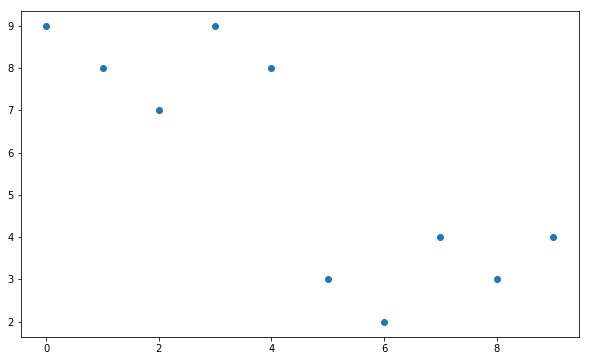

In [115]:
plt.figure(figsize=(10,6))
plt.scatter(t,y)
plt.show()

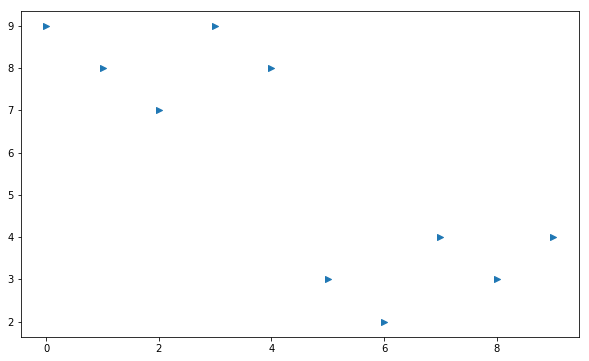

In [116]:
plt.figure(figsize=(10,6))
plt.scatter(t,y, marker='>')
plt.show()

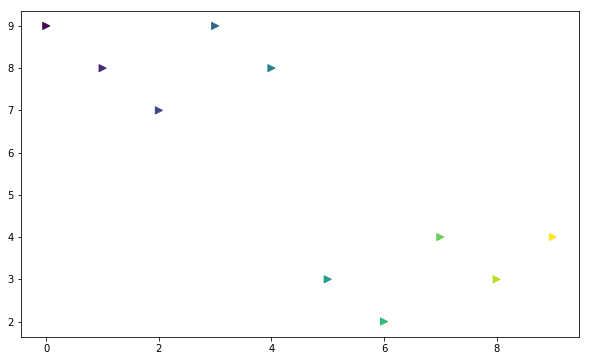

In [117]:
colormap = t

plt.figure(figsize=(10,6))
plt.scatter(t,y, s = 50, c = colormap, marker='>')
plt.show()
#s는 마커의 사이즈
#c는 칼라로 다르게 표시

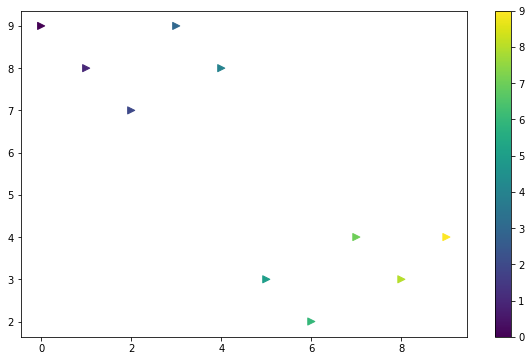

In [118]:
colormap = t

plt.figure(figsize=(10,6))
plt.scatter(t,y, s = 50, c = colormap, marker='>')
plt.colorbar()
plt.show()

In [119]:
s1 = np.random.normal(loc=0, scale=1, size=1000)
s2 = np.random.normal(loc=5, scale=0.5, size=1000)
s3 = np.random.normal(loc=10, scale=2, size=1000)
#loc는 평균값 scale은 표준편차, 1000개의 값을 random 하게 발생

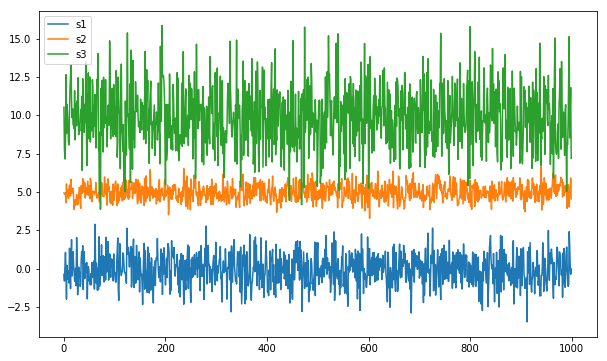

In [120]:
plt.figure(figsize=(10,6))
plt.plot(s1, label='s1')
plt.plot(s2, label='s2')
plt.plot(s3, label='s3')
plt.legend()
plt.show()
#평균이 10이고, 표준편차가 2만큼 큰 s3는 아래 그래프에서
#맨 위에 나타나게 되고, 
#표준편차가 크므로 크게 상하로 그려짐.

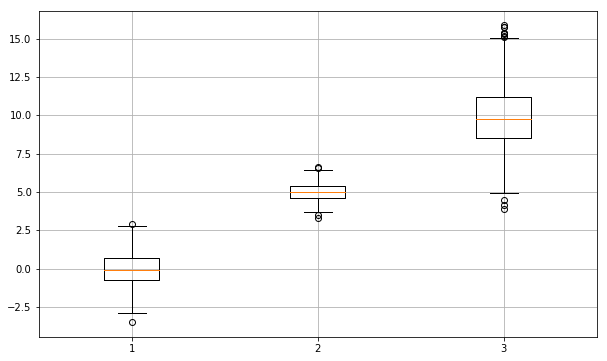

In [121]:
plt.figure(figsize=(10,6))
plt.boxplot((s1, s2, s3))
plt.grid()
plt.show()
#평균이 10이고, 표준편차가 2만큼 큰 s3는 아래 그래프에서
##표준편차가 크므로 크게 상하로 벌어진 박스플롯이 그려짐.
#노랑색은 평균, 최상위와 최하위에 있는 값들이 평균과 많이 떨어져있게됨.

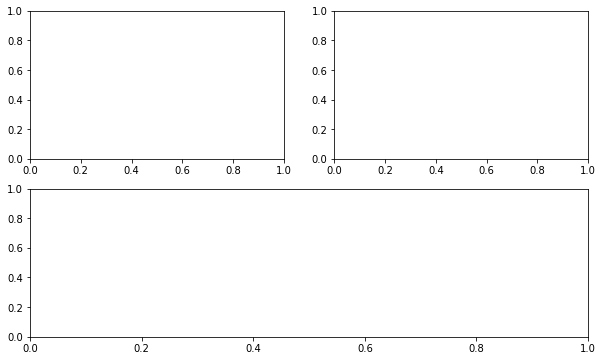

In [122]:
plt.figure(figsize=(10,6))

plt.subplot(221)
plt.subplot(222)
plt.subplot(212)

plt.show()

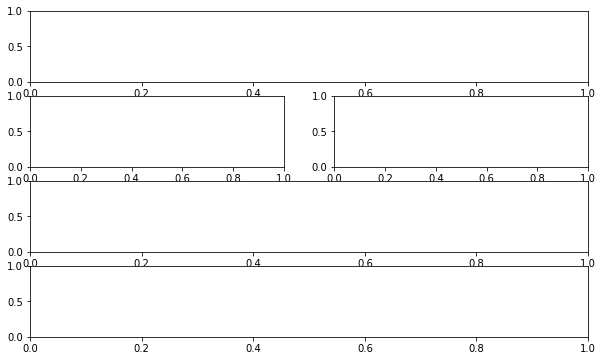

In [123]:
plt.figure(figsize=(10,6))

plt.subplot(411)
plt.subplot(423)
plt.subplot(424)
plt.subplot(413)
plt.subplot(414)

plt.show()

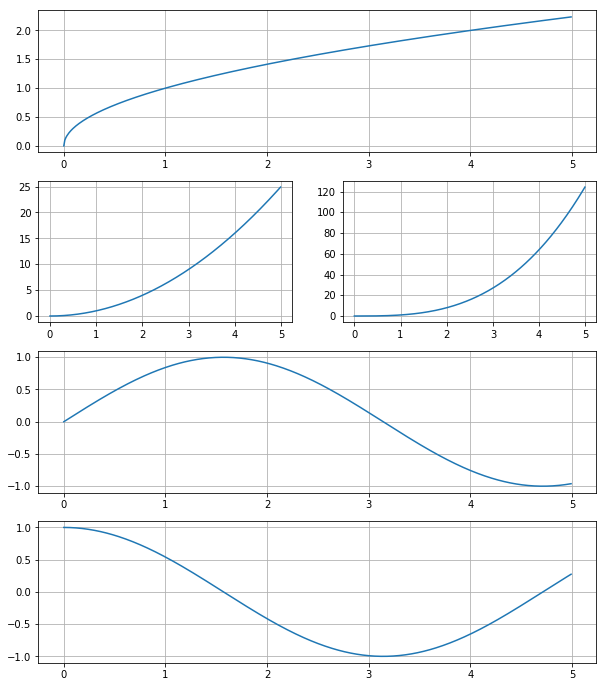

In [124]:
t = np.arange(0,5,0.01)

plt.figure(figsize=(10,12))

plt.subplot(411)
plt.plot(t,np.sqrt(t))
plt.grid()

plt.subplot(423)
plt.plot(t,t**2)
plt.grid()

plt.subplot(424)
plt.plot(t,t**3)
plt.grid()

plt.subplot(413)
plt.plot(t,np.sin(t))
plt.grid()

plt.subplot(414)
plt.plot(t,np.cos(t))
plt.grid()

plt.show()

# 9. CCTV와 인구현황 그래프로 분석하기

In [125]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

In [126]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


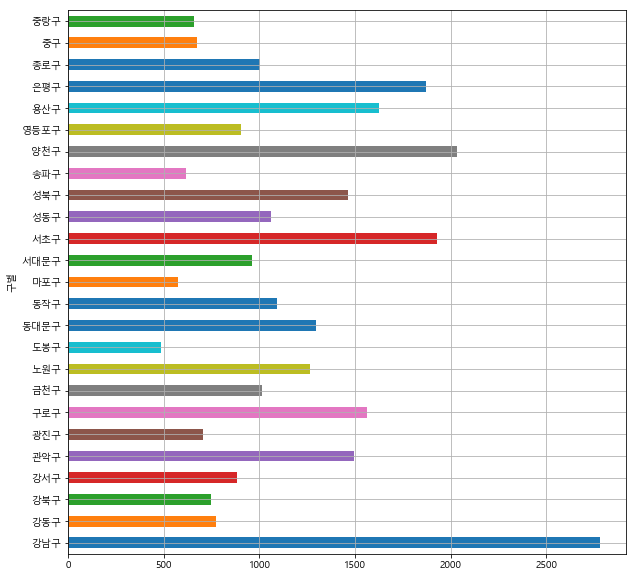

In [127]:
plt.figure()
data_result['소계'].plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

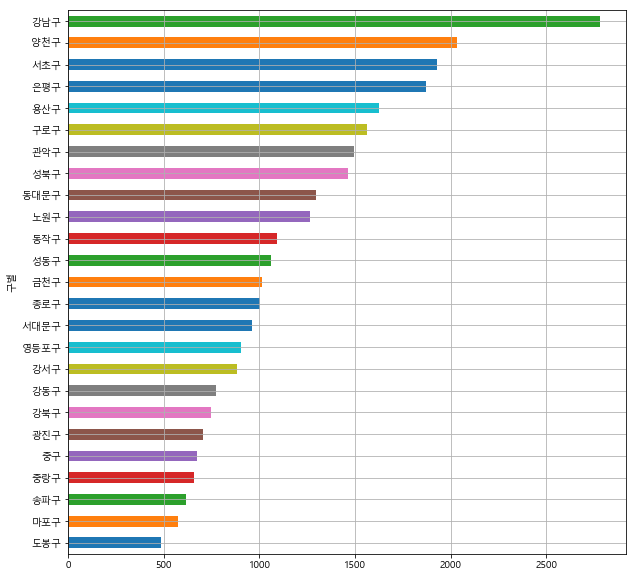

In [128]:
data_result['소계'].sort_values().plot(kind='barh', 
                                     grid=True, figsize=(10,10))
plt.show()

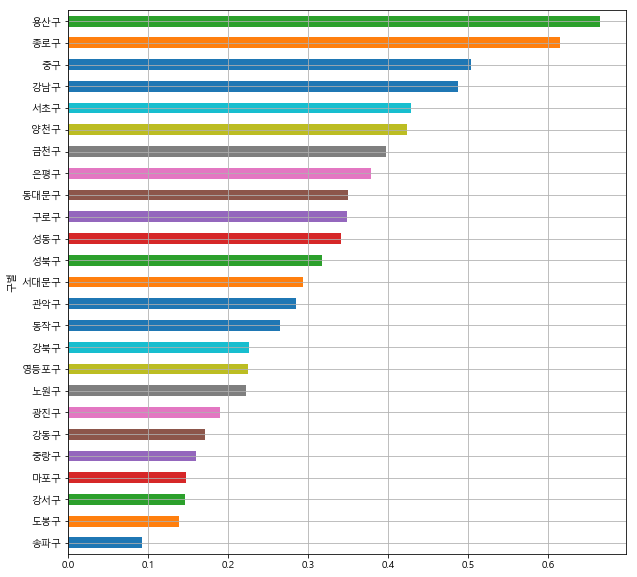

In [129]:
data_result['CCTV비율'] = data_result['소계'] / data_result['인구수'] * 100

data_result['CCTV비율'].sort_values().plot(kind='barh', 
                                         grid=True, figsize=(10,10))
plt.show()

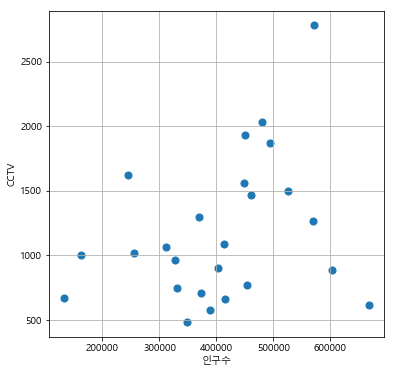

In [130]:
plt.figure(figsize=(6,6))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

In [131]:
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)
fp1

array([1.30916415e-03, 6.45066497e+02])

In [132]:
f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

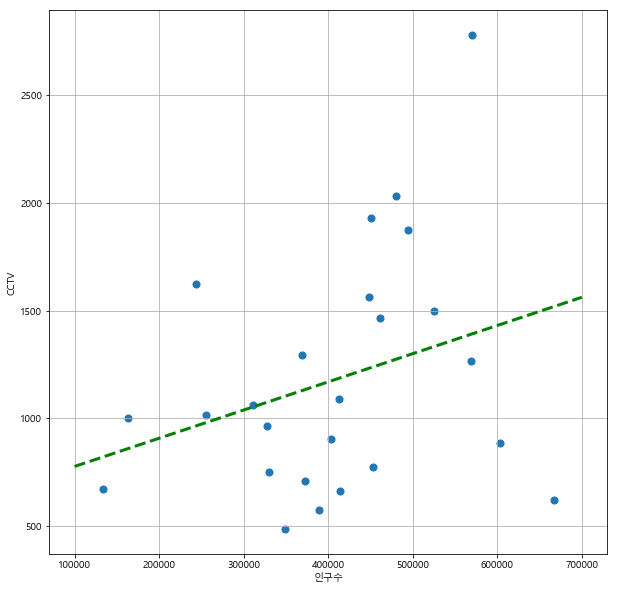

In [133]:
plt.figure(figsize=(10,10))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

# 10. 조금더 설득력 있는 자료 만들기

In [134]:
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)

f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

data_result['오차'] = np.abs(data_result['소계'] - f1(data_result['인구수']))

df_sort = data_result.sort_values(by='오차', ascending=False)
df_sort.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.487292,1388.055355
송파구,618,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599,0.092587,900.911312
양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964,0.423769,760.563512
서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308,0.428594,695.403794
용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427,0.665020,659.231690


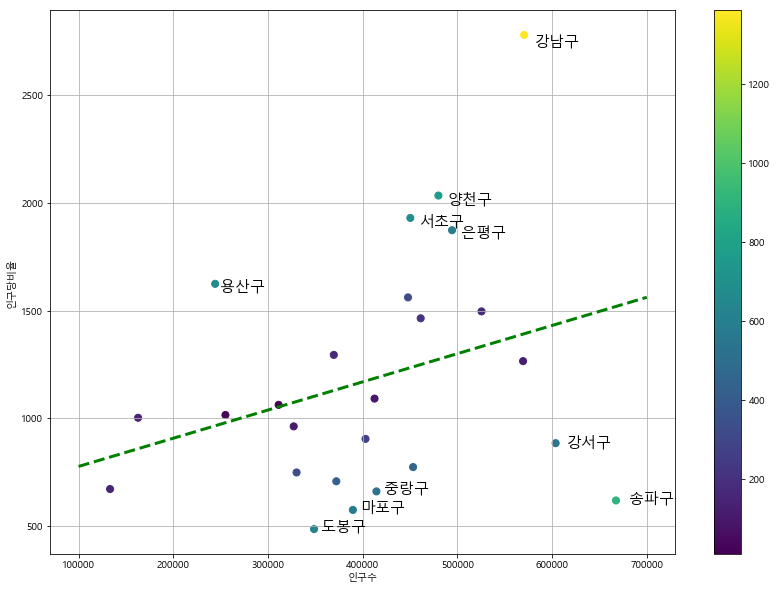

In [135]:
plt.figure(figsize=(14,10))
plt.scatter(data_result['인구수'], data_result['소계'], 
            c=data_result['오차'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')

for n in range(10):
    plt.text(df_sort['인구수'][n]*1.02, df_sort['소계'][n]*0.98, 
             df_sort.index[n], fontsize=15)
    
plt.xlabel('인구수')
plt.ylabel('인구당비율')
plt.colorbar()
plt.grid()
plt.show()

* 서울시에서 다른 구와 비교했을 때, 강남구, 양천구, 서초구, 은평구는 CCTV가 많지만,
* 송파구, 강서구, 도봉구, 마포구는 다른 구에 비해 CCTV 비율이 낮다

In [136]:
#어떤 구에 CCTV를 늘려야하는가?